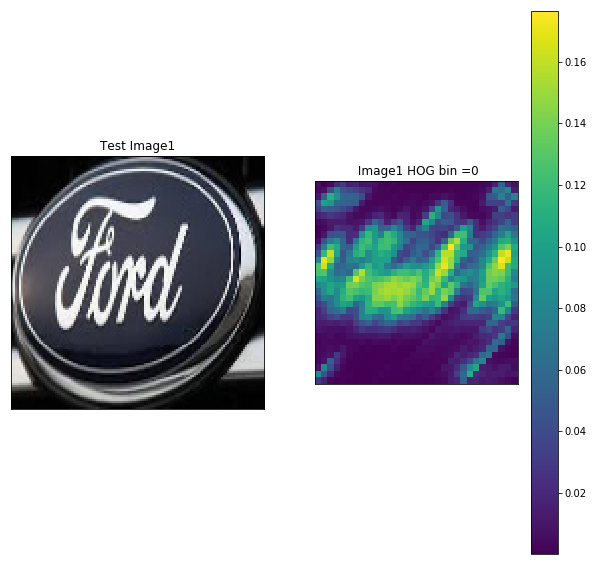

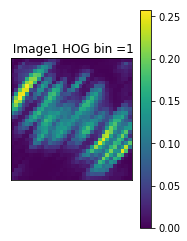

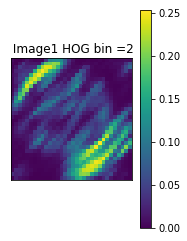

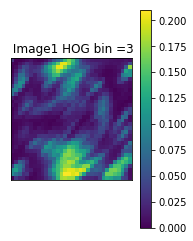

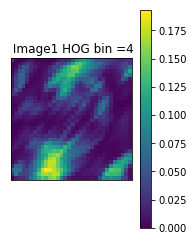

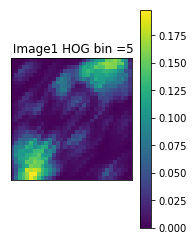

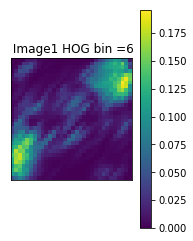

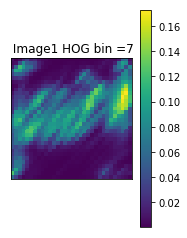

Ford=1 VW= -1
3.14 PREDICTION = 1


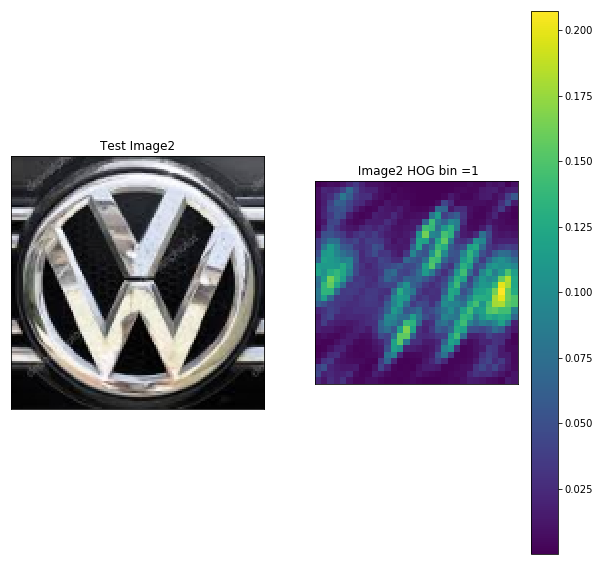

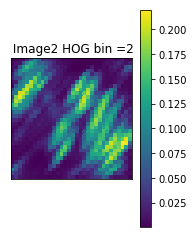

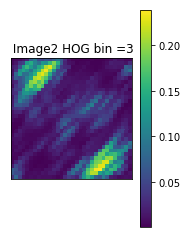

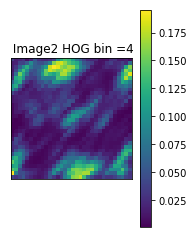

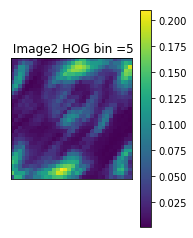

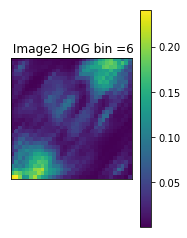

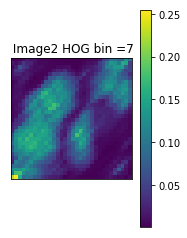

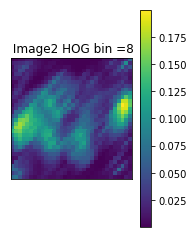

Ford=1 VW= -1
3.14 PREDICTION = -1


In [18]:
#3.1 IMAGE CLASSIFICATION

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as kClassifier
from sklearn.model_selection import  train_test_split 

######################################TRAINING################################################

#load images
ford1 = cv2.imread('ford_train1.jpeg')
ford2 = cv2.imread('ford_train2.jpeg')
ford3 = cv2.imread('ford_train3.jpeg')
ford4 = cv2.imread('ford_train4.png')
ford5 = cv2.imread('ford_train5.jpeg')
volks6 = cv2.imread('volks_train1.png')
volks7 = cv2.imread('volks_train2.jpeg')
volks8 = cv2.imread('volks_train3.jpeg')
volks9 = cv2.imread('volks_train4.jpeg')
volks10 = cv2.imread('volks_train5.jpeg')

#3.11
#resize images 
width = 128 
height = 128
ford1 = cv2.resize(ford1,(width,height))
ford2 =cv2.resize(ford2,(width,height))
ford3 = cv2.resize(ford3,(width,height))
ford4 = cv2.resize(ford4,(width,height))      
ford5 = cv2.resize(ford5,(width,height))
volks6 = cv2.resize(volks6,(width,height))
volks7 = cv2.resize(volks7,(width,height))
volks8 = cv2.resize(volks8,(width,height))
volks9 = cv2.resize(volks9,(width,height))
volks10 = cv2.resize(volks10,(width,height))

#3.12 Compute HoG features of size (32,32,8). Apply block norm in 4x4 cell neighbourhood on all images

#create image list and append all training images 
image_list = []

image_list.append(ford1)
image_list.append(ford2)
image_list.append(ford3)
image_list.append(ford4)
image_list.append(ford5)
image_list.append(volks6)
image_list.append(volks7)
image_list.append(volks8)
image_list.append(volks9)
image_list.append(volks10)

#Convert all Images in list to RGB
for i in range(0,10):
    
    image_list[i] = cv2.cvtColor(image_list[i], cv2.COLOR_BGR2RGB)
    
cell_size = (4, 4)  # h x w in pixels
block_size = (4, 4)  # h x w in cells, (128/32)x(128/32)
nbins = 8  # number of orientation bins

#array to store hog features
hog_feat = []

#Iterate through all images
for i in range(0, 10):
    
    # create HoG Object
    # winSize is the size of the image cropped to an multiple of the cell size
    hog = cv2.HOGDescriptor(_winSize=(image_list[i].shape[1] // cell_size[1] * cell_size[1],
                                  image_list[i].shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

    n_cells = (image_list[i].shape[0] // cell_size[0], image_list[i].shape[1] // cell_size[1])

    # Compute HoG features using Hog object defined above
    hog_feats = hog.compute(image_list[i])\
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  # index blocks by rows first
    
    # hog_feats now contains the gradient amplitudes for each direction,for each cell of its group for each group.
    # Indexing is by rows then columns.

    #computation for BlockNorm, normalizing within overlapping block of cells
    #declare arrays
    gradients = np.full((n_cells[0], n_cells[1], 8), 0, dtype=float)
    cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

    for off_y in range(block_size[0]):
        for off_x in range(block_size[1]):
            gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                      off_x:n_cells[1] - block_size[1] + off_x + 1] += \
                hog_feats[:, :, off_y, off_x, :]
            cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                       off_x:n_cells[1] - block_size[1] + off_x + 1] += 1

    # Average gradients
    gradients /= cell_count
    flatgradients = gradients.flatten()
    
    #append features to store in array, at the end of for loop this array has all features
    hog_feat.append(flatgradients)
    
# 3.13- Fit a nearest neighbour classifier with 3 neighbours 
   
#convert hog_feats array to an np array
hog_feat = np.array(hog_feat,'float64')

#use KClassifier with 3 nieghbours 
classifier = kClassifier(n_neighbors = 3)
#class label 1 for ford and -1 for volks 
carsclassification = [1,1,1,1,1,-1,-1,-1,-1,-1]

#split training data and targets
X_train, X_test, y_train, y_test = train_test_split(hog_feat, carsclassification, test_size=0.25, random_state=42)

#fit model to train the classifier with data 
classifier.fit(X_train, y_train)


#################PART 2 -TESTING######################

#load images
fordtest = cv2.imread('ford_test.jpeg')
volkstest = cv2.imread('volks_test.jpeg')

#3.11 Resize test images 

width = 128 
height = 128
fordtest = cv2.resize(fordtest,(width,height))
volkstest = cv2.resize(volkstest,(width,height))

#3.12 Compute HoG features 

#put two images in a list
test_list = []
test_list.append(fordtest)
test_list.append(volkstest)

#convert to RGB
for i in range(0,2):
    
    test_list[i] = cv2.cvtColor(test_list[i],cv2.COLOR_BGR2RGB)

cell_size = (4, 4)  # h x w in pixels
block_size = (4, 4)  # h x w in cells, same as prev question= 128/32
nbins = 8  # number of orientation bins

#create array to store gradients
hog_feat_test = []

#Iterate through all images

for i in range(0, 2):
    
    # create HoG Object
    # winSize is the size of the image cropped to an multiple of the cell size
    
    hog = cv2.HOGDescriptor(_winSize=(test_list[i].shape[1] // cell_size[1] * cell_size[1],
                                  test_list[i].shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

    n_cells = (test_list[i].shape[0] // cell_size[0], test_list[i].shape[1] // cell_size[1])

    # now we Compute HoG features
    
    hog_feat = hog.compute(test_list[i])\
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  # index blocks by rows first
    
    # hog_feat now contains the gradient amplitudes for each direction,for each cell of its group for each group.
    # Indexing is by rows then columns.

    # computation for BlockNorm
    testgradients = np.full((n_cells[0], n_cells[1], 8), 0, dtype=float)
    cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

    for off_y in range(block_size[0]):
        for off_x in range(block_size[1]):
            testgradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                      off_x:n_cells[1] - block_size[1] + off_x + 1] += \
                hog_feat[:, :, off_y, off_x, :]
            cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                       off_x:n_cells[1] - block_size[1] + off_x + 1] += 1
    # Average gradients
    testgradients /= cell_count
    
#3.13, Display the feautures for both test images
    plt.figure(figsize = (10,10))
    plt.subplot(121)
    plt.imshow(test_list[i], cmap='gray')
    plt.title("Test Image" + str(i+1) ), plt.xticks([]), plt.yticks([])
    
    #display 8 bins 
    
    bin = 0  # angle is 360 / nbins * direction
    plt.subplot(122)
    plt.pcolor(testgradients[:, :, bin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(" Image" + str(i+1)+ " HOG bin =" + str(i)), plt.xticks([]), plt.yticks([])
    plt.colorbar()
    plt.show()
    
    bin = 1  # angle is 360 / nbins * direction
    plt.subplot(122)
    plt.pcolor(testgradients[:, :, bin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(" Image" + str(i+1)+ " HOG bin =" + str(i+1)), plt.xticks([]), plt.yticks([])
    plt.colorbar()
    plt.show()
    
    bin = 2  # angle is 360 / nbins * direction
    plt.subplot(122)
    plt.pcolor(testgradients[:, :, bin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(" Image" + str(i+1)+ " HOG bin =" + str(i+2)), plt.xticks([]), plt.yticks([])
    plt.colorbar()
    plt.show()
    
    bin = 3  # angle is 360 / nbins * direction
    plt.subplot(122)
    plt.pcolor(testgradients[:, :, bin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(" Image" + str(i+1)+ " HOG bin =" + str(i+3)), plt.xticks([]), plt.yticks([])
    plt.colorbar()
    plt.show()
    
    bin = 4  # angle is 360 / nbins * direction
    plt.subplot(122)
    plt.pcolor(testgradients[:, :, bin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(" Image" + str(i+1)+ " HOG bin =" + str(i+4)), plt.xticks([]), plt.yticks([])
    plt.colorbar()
    plt.show()
    
    bin = 5  # angle is 360 / nbins * direction
    plt.subplot(122)
    plt.pcolor(testgradients[:, :, bin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(" Image" + str(i+1)+ " HOG bin =" + str(i+5)), plt.xticks([]), plt.yticks([])
    plt.colorbar()
    plt.show()
    
    bin = 6  # angle is 360 / nbins * direction
    plt.subplot(122)
    plt.pcolor(testgradients[:, :, bin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(" Image" + str(i+1)+ " HOG bin =" + str(i+6)), plt.xticks([]), plt.yticks([])
    plt.colorbar()
    plt.show()
    
    bin = 7  # angle is 360 / nbins * direction
    plt.subplot(122)
    plt.pcolor(testgradients[:, :, bin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(" Image" + str(i+1)+ " HOG bin =" + str(i+7)), plt.xticks([]), plt.yticks([])
    plt.colorbar()
    plt.show()
    
#3.14Classify Test images using classifier built above 
    
    #predict takes input 2d array, flatten 3d array (becomes 1d) and append for the two images to create 2d array
    testgradients = testgradients.flatten()
    hog_feat_test.append(testgradients)
    
    #predict result

    pred = classifier.predict(hog_feat_test)
    
    print("Ford=1 VW= -1")
    print("3.14 PREDICTION = "+ str( pred[i]))
    



1. 
HoG is not invariant to rotation, it is infact very sensitive to image rotation. Rotating the image will change the gradient orientation and location. We are able to compute the homography between a reference image and a rotated sample, we can then apply appropriate rotation to the rotated image to align it. Another option would be to use a rotation invariant descriptor.


2. 
We require 2 directions of the gradient to classify the images into 3 categories. HoG will generate gradients normal to the diagonals, we can compute the gradients normal to both diagonals to be able to classify into 3 categories. 